
# <span style="color:rgb(213,80,0)">This script generates Figure 3</span>

Figure 3 represents random realizations of the radius process, with and without correction term. Therefore, as first step we simulate the radius process realisations with function paper\_Figure\_3.m, for fixed $n$ , $p$ , $\nu$ and $\alpha_0$ . Note that paper\_Figure\_3.m is a simplified version of the function used to estimate the radius process quantiles, which needs to run over many combinations of the above parameters. Note also that here, for performance reasons,  the replicates are set to $B=100$ , as we just need to illustrate the concept: to reprocuce Figure 3 properly, set $B$ to $1000$ .



In [1]:
% Step 1: simulate radius process for fixed n, p, nu, alpha0

savein = ['.' filesep 'Fig3' filesep];

data  = 'T';
model = 'T';

B     = 100;
p     = 2;
nu    = 5;
n     = 2000;

alpha0  = 0.25;
[outSIM_a25 , DDs_a25, outPISON_a25, WWS_a25, WWU_a25] = ...
    paper_Figure_3(n,p,nu,B,alpha0,data,model,savein);

rep=5 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=10 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=7 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=4 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=9 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=3 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=8 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=6 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=2 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=1 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=40 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=55 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=60 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=59 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=30 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=50 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=25 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=45 - alpha0=0.25 --- n=2000 - trimmed=500 - h=1500
rep=44 - alpha0=0.2

In [2]:

alpha0  = 0.50;
[outSIM_a50 , DDs_a50, outPISON_a50, WWS_a50, WWU_a50] = ...
    paper_Figure_3(n,p,nu,B,alpha0,data,model,savein);

rep=5 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=10 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=7 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=4 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=9 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=3 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=8 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=6 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=2 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=1 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=30 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=25 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=50 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=60 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=45 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=35 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=15 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=20 - alpha0=0.5 --- n=2000 - trimmed=999 - h=1001
rep=55 - alpha0=0.5 --- n=2000 - trim




Now that we got 1000 realisations of the radius, we can generate the Figure. Here we do it for $\alpha_0 =0.25$ and the case of $\alpha_0 =0.50$ can be generated similarily.




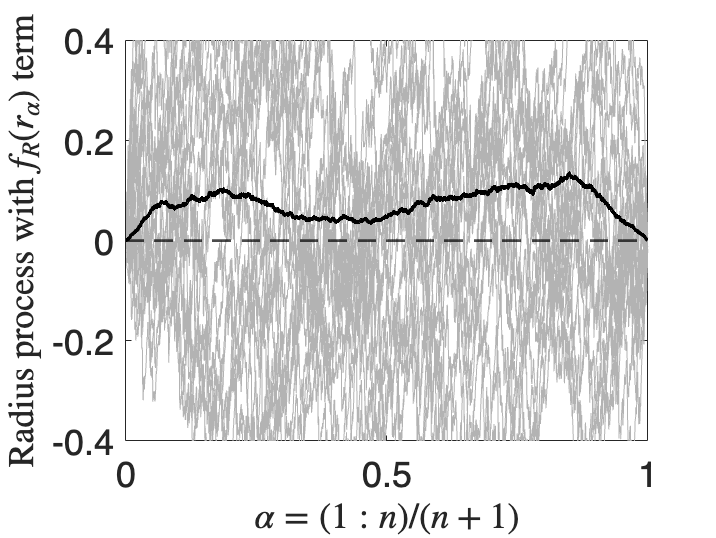

In [3]:
% Step 2: generate Figure 3 for fixed n, p, nu, alpha0

% switch to true if you want to save the figure locally
save_figure = false;

savein = ['.' filesep 'Fig3' filesep];
if ~exist(savein,'dir')
    mkdir(savein);
end

% run once for alpha0 = 0.25 and another for 0.50
alpha0  = 0.25;
%alpha0  = 0.50;

if alpha0 == 0.25
    WS = WWS_a25{1};
    WU = WWU_a25{1};
elseif alpha0 == 0.50
    WS = WWS_a50{1};
    WU = WWU_a50{1};
end
WSvar = var(WS,0,1); WSvar=WSvar(:);
WUvar = var(WU,0,1); WUvar=WUvar(:);

% font used in figure axsis
stdfont = 20;

%alpha = (n-(1:n)+1) / (n+1);
alpha = ((1:n)+1) / (n+1);
alpha = alpha(:);

K = 20;

WS = WS(1:K,1,:);
WS = flipud(squeeze(WS(1:K,:,:)));

WU = WU(1:K,1,:);
WU = flipud(squeeze(WU(1:K,:,:)));

hfig1 = figure; afig1 = gca(hfig1);
plot(alpha,WS,'Color',[.7 .7 .7]);
hold on;
plot(alpha,WSvar,'Color','k','LineWidth',2);
yline(0,'--k','LineWidth',1.5);
hold off;
ylim([-0.4 0.4]);
set(gca,'FontSize',stdfont);
xlabel(' !!!EQ_10!!! ','Interpreter','latex','FontSize',stdfont);
ylabel('Radius process with  !!!EQ_11!!!  term','Interpreter','latex','FontSize',stdfont);


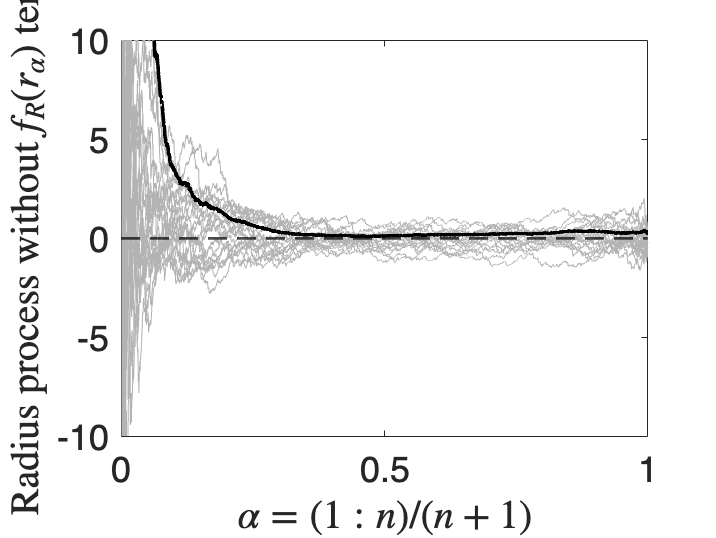

In [4]:

if save_figure
    if alpha0 == 0.25
        savein1 = [savein 'Fig3a'];
    elseif alpha0 == 0.50
        savein1 = [savein 'Fig3c'];
    else
        savein1 = [savein 'Fig3_S_alpha0' num2str(alpha0*100)];
    end
    saveas(hfig1, [savein1 '.fig'], 'fig');
    saveas(hfig1, [savein1 '.eps'], 'epsc');
    saveas(hfig1, [savein1 '.png'], 'png');
end

hfig2 = figure; afig2 = gca(hfig2);
plot(alpha,WU,'Color',[.7 .7 .7]);
hold on;
plot(alpha,WUvar,'Color','k','LineWidth',2);
yline(0,'--k','LineWidth',1.5);
hold off;
%set(gca, 'XDir','reverse')
ylim([-10 10]);
xlabel(' $\alpha=(1:n)/(n+1)$ ','Interpreter','latex','FontSize',stdfont);
ylabel('Radius process without $f_{R}({r_{\alpha}})$ term','Interpreter','latex','FontSize',stdfont);
set(gca,'FontSize',stdfont);

In [5]:

if save_figure
    if alpha0 == 0.25
        savein2 = [savein 'Fig3b'];
    elseif alpha0 == 0.50
        savein2 = [savein 'Fig3d'];
    else
        savein2 = [savein 'Fig3_U_alpha0' num2str(alpha0*100)];
    end
    saveas(hfig2, [savein2 '.fig'], 'fig');
    saveas(hfig2, [savein2 '.eps'], 'epsc');
    saveas(hfig2, [savein2 '.png'], 'png');
end
